## Chinese cabagge detection

Once that the model was created, next step is to test it, using  images that wer not used for training.
We left 200 images for this purpose

#### Set model configuration

In [1]:
from utils import tf_model_detection as tfmd
import tensorflow as tf

In [2]:
# Assign the chinese cabbage class ID
class_id = 1

# define a dictionary describing the chinese cabbage class
category_index = {class_id :
                      {'id'  : class_id,
                      'name': 'ch_cabbage'}
                      }

# Specify the number of classes that the model will predict
num_classes = 1

In [3]:
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
detection_model = tfmd.model_initialization(pipeline_config, num_classes)

learning_rate = 0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate,
                                    momentum=0.9)
## set training parameters
checkpoint_path = './tf_ch_ckpts'

ckpt = tf.train.Checkpoint(step=tf.Variable(1),
                           optimizer=opt,
                           model=detection_model)

manager = tf.train.CheckpointManager(ckpt,
                                     checkpoint_path,
                                     max_to_keep=3)

ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
else:
    print("Initializing from scratch.")


Restored from ./tf_ch_ckpts\ckpt-2785


#### Read images

In [4]:
from utils import image_processing as img_pr
import matplotlib.pyplot as plt
import os

In [12]:
imgs_data = []

In [19]:
folder_path = "2019/katsuura/before_cut"
#folder_path = "2017"

input_folder = os.path.join("images", folder_path, "")
imgs_data = []
imgs_data = img_pr.ImageData(input_folder,
                             id_image=list(range(500)),
                             pattern="jpg",
                             scale_percentage=25)

100%|██████████| 500/500 [14:40<00:00,  1.76s/it]


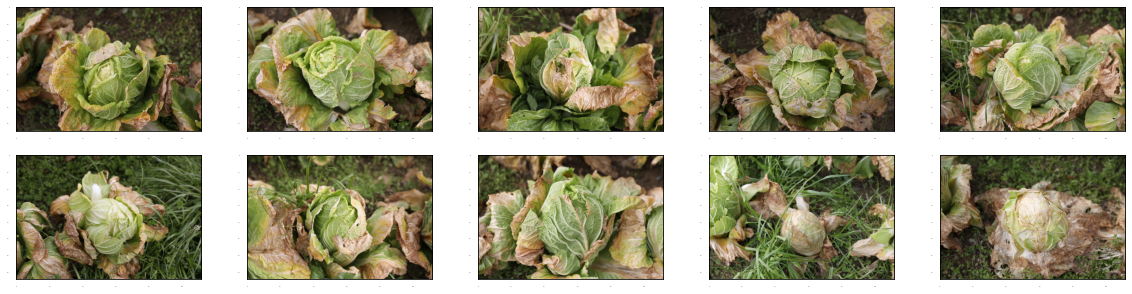

In [20]:
%matplotlib inline
import random
# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [20, 5]
idlist = list(range(len(imgs_data.images_data)))
random.shuffle(idlist)
# plot images
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs_data.images_data[idlist[i]])

### image detection

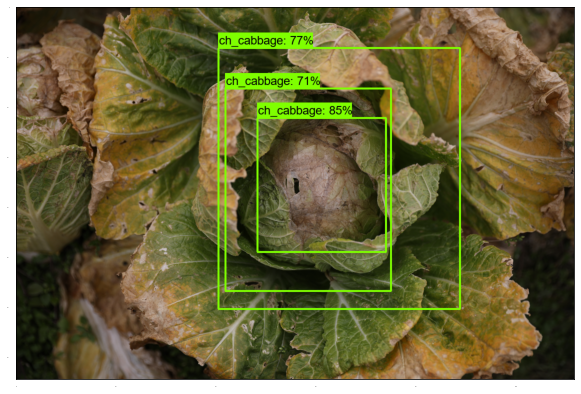

In [15]:
plt.figure(figsize = (10, 20))
import random
# configure plot settings via rcParams
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [20, 5]
idlist = list(range(len(imgs_data.images_data)))
random.shuffle(idlist)
# plot images
for i in range(10): 
    test = img_pr.single_image_detection(imgs_data.images_data[idlist[i]],
                            detection_model, cat_index=category_index,plot=True, min_score=0.50)


In [21]:

detections_list = imgs_data.object_detection(detection_model,
                                             category_index,
                                             min_score=0.65,
                                             output_path="results/y2019/", plot=True)

100%|██████████| 500/500 [04:00<00:00,  2.08it/s]


In [22]:
min_score = 0.65
output_folder = "images/input_score/"
yearfn = "2019_katsuura_"
for i in range(len(detections_list)):
    if detections_list[i]['detection_scores'][0] > min_score:
        img_size = imgs_data.images_data[i].shape
        fn = imgs_data.id_image[i]
        filename = os.path.join(output_folder, 'y'+yearfn+'_'+str(i) + fn)

        img_pr.export_masked_image(imgs_data.images_data[i], detections_list[i], filename)


Image saved: images/input_score/y2019_katsuura__101_1_4N6A7658.JPG
Image saved: images/input_score/y2019_katsuura__201_1_4N6A7659.JPG
Image saved: images/input_score/y2019_katsuura__301_1_4N6A7660.JPG
Image saved: images/input_score/y2019_katsuura__401_1_4N6A7661.JPG
Image saved: images/input_score/y2019_katsuura__701_1_4N6A7664.JPG
Image saved: images/input_score/y2019_katsuura__801_1_4N6A7665.JPG
Image saved: images/input_score/y2019_katsuura__901_1_4N6A7666.JPG
Image saved: images/input_score/y2019_katsuura__1001_1_4N6A7667.JPG
Image saved: images/input_score/y2019_katsuura__3101_1_4N6A7688.JPG
Image saved: images/input_score/y2019_katsuura__3301_1_4N6A7690.JPG
Image saved: images/input_score/y2019_katsuura__3601_1_4N6A7693.JPG
Image saved: images/input_score/y2019_katsuura__3801_1_4N6A7695.JPG
Image saved: images/input_score/y2019_katsuura__3901_1_4N6A7696.JPG
Image saved: images/input_score/y2019_katsuura__4401_1_4N6A7701.JPG
Image saved: images/input_score/y2019_katsuura__4901_1_

In [18]:
imgs_data = []